### Marcin Chowaniec - lab 5 wariant 9

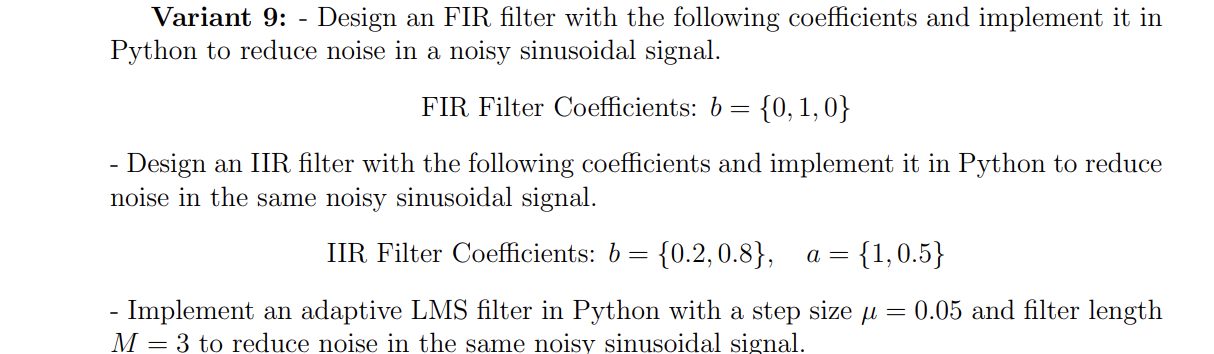

In [14]:
# importing packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

### 1. SIGNAL GENERATION: NOISY SINUSOIDAL SIGNAL

In [15]:
# Define sampling parameters
fs = 1000  # Sampling frequency (Hz)
T = 1.0    # Duration (seconds)
N = int(fs * T)  # Total number of samples
t = np.linspace(0, T, N, endpoint=False) # Time vector

# Clean sinusoidal signal (s): 5 Hz frequency
f_sig = 5
s = 1.0 * np.sin(2 * np.pi * f_sig * t)


np.random.seed(42) # for reproducible noise generation
noise_power = 0.5
noise = noise_power * np.random.randn(N)

# Noisy input signal (x)
x = s + noise

### 2. FIR FILTER IMPLEMENTATION

In [16]:
# FIR Filter Coefficients: b = {0, 1, 0}
b_fir = [0, 1, 0]
a_fir = [1.0] 

# filter using scipy.signal.lfilter
y_fir = lfilter(b_fir, a_fir, x)

### 3. IIR FILTER IMPLEMENTATION

In [17]:
# IIR Filter Coefficients: b = {0.2, 0.8}, a = {1, 0.5}
# filter : y_iir[n] = (0.2*x[n] + 0.8*x[n-1]) - 0.5*y_iir[n-1]
b_iir = [0.2, 0.8]
a_iir = [1, 0.5]

y_iir = lfilter(b_iir, a_iir, x)

### 4. ADAPTIVE LMS FILTER IMPLEMENTATION

In [18]:
def lms_filter(x, d, mu, num_taps):
    n = len(x)
    w = np.zeros(num_taps) # Initial filter weights
    y = np.zeros(n)      # Filter output
    e = np.zeros(n)      # Error signal

    for i in range(num_taps, n):
        x_segment = x[i-num_taps:i][::-1]
        
        # 2. Filter Output Calculation: y[n] = w^T * x[n]
        y[i] = np.dot(w, x_segment)
        
        # 3. Error Calculation: e[n] = d[n] - y[n]
        e[i] = d[i] - y[i]
        
        # 4. Weight Update (LMS Algorithm): w[n+1] = w[n] + mu * e[n] * x[n]
        w += mu * e[i] * x_segment

    return y, e, w

# LMS Parameters
mu_lms = 0.01      # Step size (s) as required
num_taps_lms = 10  # Arbitrary choice, often 5-20 taps are sufficient

y_lms, e_lms, w_lms = lms_filter(x, s, mu_lms, num_taps_lms)

### 5. VISUALIZATION OF RESULTS

#### Original and Noisy signal

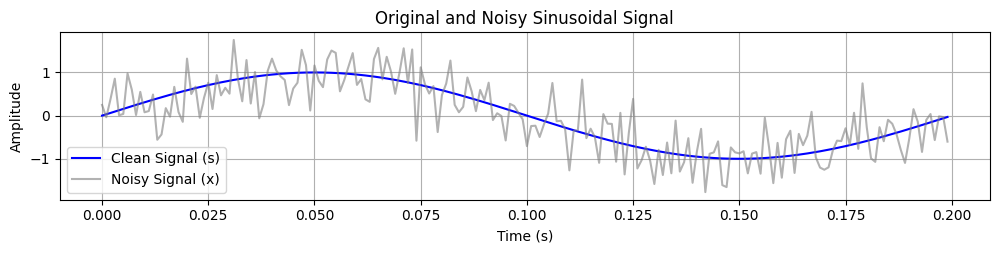

In [19]:
t_plot_limit = int(0.2 * fs)

plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(t[:t_plot_limit], s[:t_plot_limit], label='Clean Signal (s)', color='blue')
plt.plot(t[:t_plot_limit], x[:t_plot_limit], label='Noisy Signal (x)', color='gray', alpha=0.6)
plt.title('Original and Noisy Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

#### FIR Filter Output

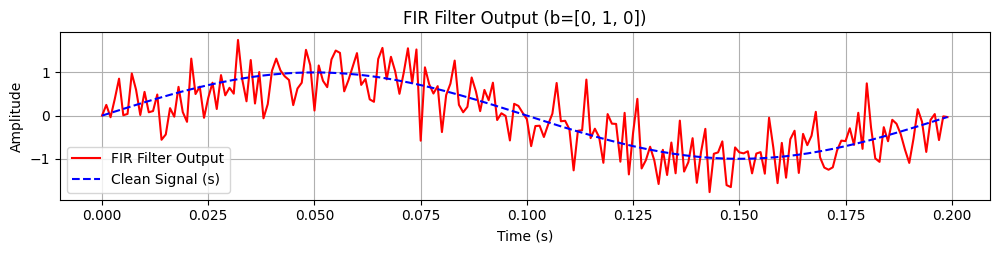

In [20]:

plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 2)
plt.plot(t[:t_plot_limit], y_fir[:t_plot_limit], label='FIR Filter Output', color='red')
plt.plot(t[:t_plot_limit], s[:t_plot_limit], label='Clean Signal (s)', color='blue', linestyle='--')
plt.title(f'FIR Filter Output (b={b_fir})')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

#### IIR Filter Output

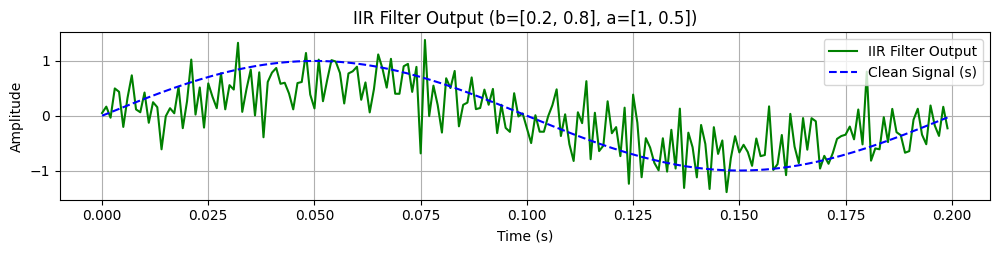

In [21]:
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 3)
plt.plot(t[:t_plot_limit], y_iir[:t_plot_limit], label='IIR Filter Output', color='green')
plt.plot(t[:t_plot_limit], s[:t_plot_limit], label='Clean Signal (s)', color='blue', linestyle='--')
plt.title(f'IIR Filter Output (b={b_iir}, a={a_iir})')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

#### Adaptive LMS Filter Output

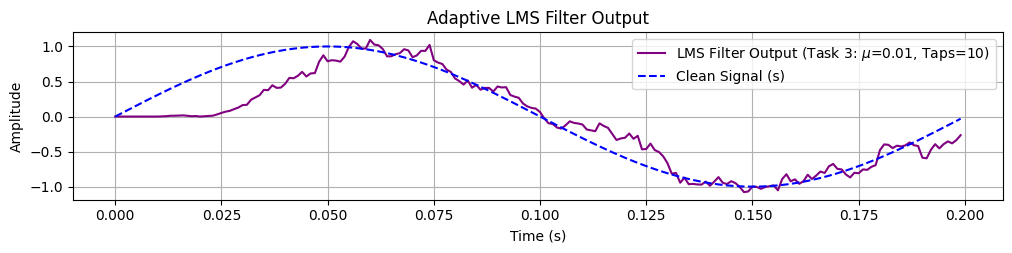

In [22]:
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 4)
plt.plot(t[:t_plot_limit], y_lms[:t_plot_limit], label=f'LMS Filter Output (Task 3: $\\mu$={mu_lms}, Taps={num_taps_lms})', color='purple')
plt.plot(t[:t_plot_limit], s[:t_plot_limit], label='Clean Signal (s)', color='blue', linestyle='--')
plt.title('Adaptive LMS Filter Output')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

In [23]:
print(f"FIR Filter Coefficients (b): {b_fir}")
print(f"IIR Filter Coefficients (b, a): {b_iir}, {a_iir}")
print(f"LMS Filter Parameters (Step, Taps): {mu_lms}, {num_taps_lms}")

FIR Filter Coefficients (b): [0, 1, 0]
IIR Filter Coefficients (b, a): [0.2, 0.8], [1, 0.5]
LMS Filter Parameters (Step, Taps): 0.01, 10
